In [ ]:
# !/usr/bin/env python
# 测试tensorflow是否安装好

import numpy as np
import tensorflow as tf

# Prepare train data
train_X = np.linspace(-1, 1, 100)
train_Y = 2 * train_X + np.random.randn(*train_X.shape) * 0.33 + 10

# Define the model
X = tf.placeholder("float")
Y = tf.placeholder("float")
w = tf.Variable(0.0, name="weight")
b = tf.Variable(0.0, name="bias")
loss = tf.square(Y - X * w - b)
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

# Create session to run
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())

    epoch = 1
    for i in range(10):
        for (x, y) in zip(train_X, train_Y):
            _, w_value, b_value = sess.run([train_op, w, b], feed_dict={X: x, Y: y})
        print("Epoch: {},   w: {},   b: {}".format(epoch, w_value, b_value))
        epoch += 1


In [1]:
### 窗口显示
import tkinter
import tkinter.messagebox

def main():
	flag = True

	# 修改标签上的文字
	def change_label_text():
		nonlocal flag
		flag = not flag
		color, msg = ('red', 'Hello, world!')\
			if flag else ('blue', 'Goodbye, world!')
		label.config(text=msg, fg=color)

	# 确认退出
	def confirm_to_quit():
		if tkinter.messagebox.askokcancel('温馨提示', '确定要退出吗?'):
			top.quit()

	# 创建顶层窗口
	top = tkinter.Tk()
	# 设置窗口大小
	top.geometry('240x160')
	# 设置窗口标题
	top.title('小游戏')
	# 创建标签对象并添加到顶层窗口
	label = tkinter.Label(top, text='Hello, world!', font='Arial -32', fg='red')
	label.pack(expand=1)
	# 创建一个装按钮的容器
	panel = tkinter.Frame(top)
	# 创建按钮对象 指定添加到哪个容器中 通过command参数绑定事件回调函数
	button1 = tkinter.Button(panel, text='修改', command=change_label_text)
	button1.pack(side='left')
	button2 = tkinter.Button(panel, text='退出', command=confirm_to_quit)
	button2.pack(side='right')
	panel.pack(side='bottom')
	# 开启主事件循环
	tkinter.mainloop()


if __name__ == '__main__':
	main()

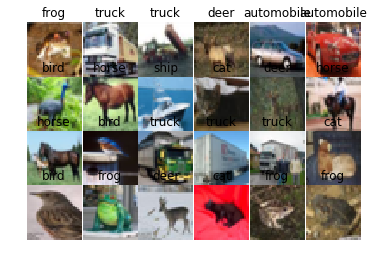

In [23]:
### 读取并显示cifar_10图片
import numpy as np
import os
from matplotlib import pyplot as plt
import pickle

def load_batch_cifar10(filename,dtype="float 64"):
    path = os.path.join(data_dir_cifar10,filename)#链接字符串，合成文件路径
    fi = open(path, 'rb')  # 打开文件
    batch = pickle.load(fi, encoding="bytes")  # 读入数据
    fi.close()
    #batch = np.load(path)
    data = batch[b'data']/255.0
    labels = batch[b'labels']#每一个数据的标签
    return data,labels#返回标签矩阵

def load_cifar10():
    x_train = []#存放训练数据，最终是50000*3072的矩阵
    y_train = []
    for i in range(5):#读取五个文件
        x,t = load_batch_cifar10("data_batch_%d"%(i+1))
        x_train.append(x)
        y_train.append(t)
    x_test ,y_test= load_batch_cifar10("test_batch")#读取测试文件
    x_train = np.concatenate(x_train,axis=0)#将五个文件的矩阵合成一个
    y_train = np.concatenate(y_train, axis=0)
    x_train = x_train.reshape(x_train.shape[0],3,32,32)
    x_test = x_test.reshape(x_test.shape[0],3,32,32)
    return x_train,y_train,x_test,y_test

data_dir = "C:\\dl"
data_dir_cifar10 = os.path.join(data_dir,"cifarpy")
class_name_cifar10 = np.load(os.path.join(data_dir_cifar10,"batches.meta"))
#print(class_name_cifar10)
Xtrain,Ytrain,Xtest,Ytest = load_cifar10()
imlist = []

for i in range(24): #显示24张图片
    red = Xtrain[i][0].reshape(1024,1)
    green = Xtrain[i][1].reshape(1024,1)
    blue = Xtrain[i][2].reshape(1024,1)
    pic = np.hstack((red,green,blue))
    pic_grab = pic.reshape(32,32,3)#合成一个三维矩阵，每一个点包含红绿蓝三种颜色
    imlist.append(pic_grab)
    
fig = plt.figure()

for j in range(1,25):
    ax = fig.add_subplot(4,6,j)#这三个参数是，图片行数，列数，编号
    plt.title(class_name_cifar10['label_names'][Ytrain[j-1]])
    plt.axis('off')#不显示坐标值
    plt.imshow(imlist[j-1])#显示图片
    
plt.subplots_adjust(wspace=0,hspace=0)
plt.show()
#end

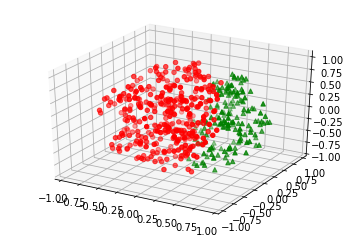

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)

# 采样个数500
n_samples = 500
dim = 3

# 先生成一组3维正态分布数据，数据方向完全随机
samples = np.random.multivariate_normal(
    np.zeros(dim),
    np.eye(dim),
    n_samples
)

# 通过把每个样本到原点距离和均匀分布吻合得到球体内均匀分布的样本
for i in range(samples.shape[0]):
    r = np.power(np.random.random(), 1.0/3.0)
    samples[i] *= r / np.linalg.norm(samples[i])

upper_samples = []
lower_samples = []

for x, y, z in samples:
    # 3x+2y-z=1作为判别平面
    if z > 3*x + 2*y - 1:
        upper_samples.append((x, y, z))
    else:
        lower_samples.append((x, y, z))

fig = plt.figure('3D scatter plot')
ax = fig.add_subplot(111, projection='3d')

uppers = np.array(upper_samples)
lowers = np.array(lower_samples)

# 用不同颜色不同形状的图标表示平面上下的样本
# 判别平面上半部分为红色圆点，下半部分为绿色三角
ax.scatter(uppers[:, 0], uppers[:, 1], uppers[:, 2], c='r', marker='o')
ax.scatter(lowers[:, 0], lowers[:, 1], lowers[:, 2], c='g', marker='^')

plt.show()

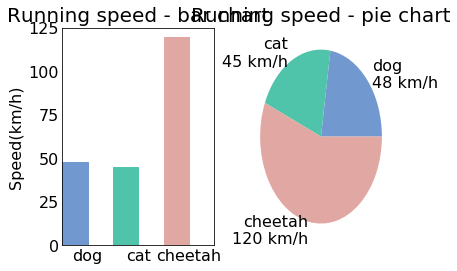

In [21]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['ytick.major.size'] = 0

# 包含了狗，猫和猎豹的最高奔跑速度，还有对应的可视化颜色
speed_map = {
    'dog': (48, '#7199cf'),
    'cat': (45, '#4fc4aa'),
    'cheetah': (120, '#e1a7a2')
}

# 整体图的标题
fig = plt.figure('Bar chart & Pie chart')

# 在整张图上加入一个子图，121的意思是在一个1行2列的子图中的第一张
ax = fig.add_subplot(121)
ax.set_title('Running speed - bar chart')

# 生成x轴每个元素的位置
xticks = np.arange(3)

# 定义柱状图每个柱的宽度
bar_width = 0.5

# 动物名称
animals = speed_map.keys()

# 奔跑速度
speeds = [x[0] for x in speed_map.values()]

# 对应颜色
colors = [x[1] for x in speed_map.values()]

# 画柱状图，横轴是动物标签的位置，纵轴是速度，定义柱的宽度，同时设置柱的边缘为透明
bars = ax.bar(xticks, speeds, width=bar_width, edgecolor='none')

# 设置y轴的标题
ax.set_ylabel('Speed(km/h)')

# x轴每个标签的具体位置，设置为每个柱的中央
ax.set_xticks(xticks+bar_width/2)

# 设置每个标签的名字
ax.set_xticklabels(animals)

# 设置x轴的范围
ax.set_xlim([bar_width/2-0.5, 3-bar_width/2])

# 设置y轴的范围
ax.set_ylim([0, 125])

# 给每个bar分配指定的颜色
for bar, color in zip(bars, colors):
    bar.set_color(color)

# 在122位置加入新的图
ax = fig.add_subplot(122)
ax.set_title('Running speed - pie chart')

# 生成同时包含名称和速度的标签
labels = ['{}\n{} km/h'.format(animal, speed) for animal, speed in zip(animals, speeds)]

# 画饼状图，并指定标签和对应颜色
ax.pie(speeds, labels=labels, colors=colors)

plt.show()

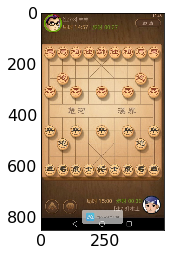

In [20]:
import matplotlib.pyplot as plt

# 读取一张照片并显示
plt.figure('A Little White Dog')
little_dog_img = plt.imread('c:\\dl\\other\\t.jpg')
plt.imshow(little_dog_img)

plt.show()

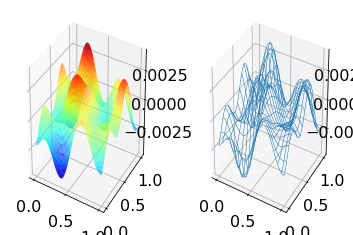

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# 3D图标必须的模块，project='3d'的定义
from mpl_toolkits.mplot3d import Axes3D     

np.random.seed(42)

n_grids = 51        	# x-y平面的格点数 
c = n_grids // 2     	# 中心位置
nf = 2              	# 低频成分的个数

# 生成格点
x = np.linspace(0, 1, n_grids)
y = np.linspace(0, 1, n_grids)

# x和y是长度为n_grids的array
# meshgrid会把x和y组合成n_grids*n_grids的array，X和Y对应位置就是所有格点的坐标
X, Y = np.meshgrid(x, y)

# 生成一个0值的傅里叶谱
spectrum = np.zeros((n_grids, n_grids), dtype=np.complex)

# 生成一段噪音，长度是(2*nf+1)**2/2
noise = [np.complex(x, y) for x, y in np.random.uniform(-1,1,((2*nf+1)**2//2, 2))]

# 傅里叶频谱的每一项和其共轭关于中心对称
noisy_block = np.concatenate((noise, [0j], np.conjugate(noise[::-1])))

# 将生成的频谱作为低频成分
spectrum[c-nf:c+nf+1, c-nf:c+nf+1] = noisy_block.reshape((2*nf+1, 2*nf+1))

# 进行反傅里叶变换
Z = np.real(np.fft.ifft2(np.fft.ifftshift(spectrum)))

# 创建图表
fig = plt.figure('3D surface & wire')

# 第一个子图，surface图
ax = fig.add_subplot(1, 2, 1, projection='3d')

# alpha定义透明度，cmap是color map
# rstride和cstride是两个方向上的采样，越小越精细，lw是线宽
ax.plot_surface(X, Y, Z, alpha=0.7, cmap='jet', rstride=1, cstride=1, lw=0)

# 第二个子图，网线图
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=3, cstride=3, lw=0.5)

plt.show()

In [ ]:
### Python+Opencv进行识别相似图片
### 来自https://blog.csdn.net/feimengjuan/article/details/51279629

### -*- coding: utf-8 -*-
### 利用python实现多种方法来实现图像识别
 
import cv2
import numpy as np
from matplotlib import pyplot as plt
 
### 最简单的以灰度直方图作为相似比较的实现
def classify_gray_hist(image1,image2,size = (256,256)):
    ###### 先计算直方图
    ##### 几个参数必须用方括号括起来
    ##### 这里直接用灰度图计算直方图，所以是使用第一个通道，
    ##### 也可以进行通道分离后，得到多个通道的直方图
    ##### bins 取为16
    image1 = cv2.resize(image1,size)
    image2 = cv2.resize(image2,size)
    hist1 = cv2.calcHist([image1],[0],None,[256],[0.0,255.0])
    hist2 = cv2.calcHist([image2],[0],None,[256],[0.0,255.0])
    ##### 可以比较下直方图
    plt.plot(range(256),hist1,'r')
    plt.plot(range(256),hist2,'b')
    plt.show()
    ##### 计算直方图的重合度
    degree = 0
    for i in range(len(hist1)):
        if hist1[i] != hist2[i]:
            degree = degree + (1 - abs(hist1[i]-hist2[i])/max(hist1[i],hist2[i]))
        else:
            degree = degree + 1
    degree = degree/len(hist1)
    return degree
 
### 计算单通道的直方图的相似值
def calculate(image1,image2):
    hist1 = cv2.calcHist([image1],[0],None,[256],[0.0,255.0])
    hist2 = cv2.calcHist([image2],[0],None,[256],[0.0,255.0])
     ##### 计算直方图的重合度
    degree = 0
    for i in range(len(hist1)):
        if hist1[i] != hist2[i]:
            degree = degree + (1 - abs(hist1[i]-hist2[i])/max(hist1[i],hist2[i]))
        else:
            degree = degree + 1
    degree = degree/len(hist1)
    return degree
 
### 通过得到每个通道的直方图来计算相似度
def classify_hist_with_split(image1,image2,size = (256,256)):
    ##### 将图像resize后，分离为三个通道，再计算每个通道的相似值
    image1 = cv2.resize(image1,size)
    image2 = cv2.resize(image2,size)
    sub_image1 = cv2.split(image1)
    sub_image2 = cv2.split(image2)
    sub_data = 0
    for im1,im2 in zip(sub_image1,sub_image2):
        sub_data += calculate(im1,im2)
    sub_data = sub_data/3
    return sub_data
 
### 平均哈希算法计算
def classify_aHash(image1,image2):
    image1 = cv2.resize(image1,(8,8))
    image2 = cv2.resize(image2,(8,8))
    gray1 = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)
    hash1 = getHash(gray1)
    hash2 = getHash(gray2)
    return Hamming_distance(hash1,hash2)
 
def classify_pHash(image1,image2):
    image1 = cv2.resize(image1,(32,32))
    image2 = cv2.resize(image2,(32,32))
    gray1 = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)
    ##### 将灰度图转为浮点型，再进行dct变换
    dct1 = cv2.dct(np.float32(gray1))
    dct2 = cv2.dct(np.float32(gray2))
    ##### 取左上角的8*8，这些代表图片的最低频率
    ##### 这个操作等价于c++中利用opencv实现的掩码操作
    ##### 在python中进行掩码操作，可以直接这样取出图像矩阵的某一部分
    dct1_roi = dct1[0:8,0:8]
    dct2_roi = dct2[0:8,0:8]
    hash1 = getHash(dct1_roi)
    hash2 = getHash(dct2_roi)
    return Hamming_distance(hash1,hash2)
 
### 输入灰度图，返回hash
def getHash(image):
    avreage = np.mean(image)
    hash = []
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j] > avreage:
                hash.append(1)
            else:
                hash.append(0)
    return hash
 
 
### 计算汉明距离
def Hamming_distance(hash1,hash2):
    num = 0
    for index in range(len(hash1)):
        if hash1[index] != hash2[index]:
            num += 1
    return num
 
 
if __name__ == '__main__':
    img1 = cv2.imread('train\\黑炮1.jpg')
    cv2.imshow('img1',img1)
    img2 = cv2.imread('train\\红炮1.jpg')
    cv2.imshow('img2',img2)
    degree = classify_gray_hist(img1,img2)
    #degree = classify_hist_with_split(img1,img2)
    #degree = classify_aHash(img1,img2)
    #degree = classify_pHash(img1,img2)
    print(degree)
    cv2.waitKey(0)